In [3]:
I_TRUE = 1.6405
a , b = 0, 0.8
def f(x):
    return 0.2 +25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

In [9]:
i_trap = (b - a)*(f(b) + f(a))/2
print(i_trap)
error = (I_TRUE - i_trap)/I_TRUE*100
print(error)

0.1728000000000225
89.46662602864843


In [10]:
i_simp = (b - a)*(f(a) + f(b) + 4*f((a+b)/2))/6
print(i_simp)
error = (I_TRUE - i_simp)/I_TRUE*100
print(error)

1.3674666666666744
16.643299806968955


In [11]:
i_simp2 = (b - a)*(f(a) + f(b) + 3*f((a+b)/3) + 3*f(2*(a+b)/3))/8
print(i_simp2)
error = (I_TRUE - i_simp2)/I_TRUE*100
print(error)

1.519170370370378
7.39589330262859


# Multi Trapezoidal and Multi Simpson

In [34]:
def multi_trap(n):
    h = (b-a)/n
    
    sum = 0
    for i in range(1,n):
        sum += f(i*h)

    i = (b-a)*(f(a) + 2*sum + f(b))/(2*n)
    error = abs((I_TRUE - i)/I_TRUE*100)
    return error




In [35]:
def multi_simp(n):
    h = (b-a)/n

    sum1, sum2 = 0, 0
    for i in range(1,n):
        if(i%2==1):
            sum1 += f(i*h)
        else:
            sum2 += f(i*h)

    i = (b-a)*(f(a) + 4*sum1 + 2*sum2 + f(b))/(3*n)
    error = abs((I_TRUE - i)/I_TRUE*100)
    return error



In [40]:
segments = [2**i for i in range(1,10)]
print(segments)
multi_trap_error = [multi_trap(n) for n in segments]
multi_simp_error = [multi_simp(n) for n in segments]


[2, 4, 8, 16, 32, 64, 128, 256, 512]


0.002022599539767755


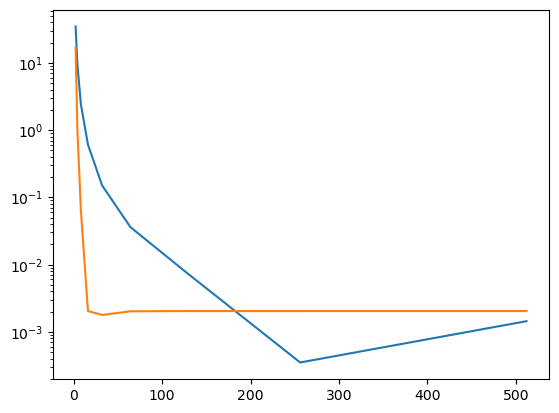

In [42]:
import matplotlib.pyplot as plt
print(multi_trap(4096))
plt.yscale('log')
plt.plot(segments, multi_trap_error)
plt.plot(segments,multi_simp_error) 